In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


##### 

# <center><span style="color:red; font-style:italic; text-decoration:underline;"> TP 5: Implémenter un réseau GRU pour l'analyse de sentiment à l'aide d'un ensemble de données au format CSV. </span></center>


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 1. Préparation de l’environnement du travail </span>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 2 . Chargement et Exploration du Jeu de Données </span>

In [3]:
base_csv = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(base_csv)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


>> ###  <span style="color:brown ; font-style:italic; text-decoration:underline;">  a - Exploration du dataset </span>

In [19]:
# Exploration du dataset
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production br br The filmin...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically theres a family where a little boy J...          0
4  Petter Matteis Love in the Time of Money is a ...          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None
sentiment
1    25000
0    25000
Name: count, dtype: int64


>> ###  <span style="color:brown ; font-style:italic; text-decoration:underline;"> b - Data Cleaning </span>

In [6]:
import string 
l =  list(df.review)
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

for i in range(len(l)) :
    l[i] = remove_punctuation(l[i])
    x = l[i].replace('<br />','')
    l[i]= x.replace('<br />','')
df.review = l 
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 3 - Encodage des labels </span>

In [7]:
# I assume sentiment is binary (positive/negative), so let's encode it to 0 and 1
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;"> 4 - Tokenisation des textes </span>

In [8]:
# Tokeniser les textes en utilisant la fonction Tokenizer de tensorflow.keras.preprocessing.text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">5 -  Convertir chaque critique textuelle en séquence numérique </span>

In [9]:
# Une fois le corpus de texte entier tokenisé
sequences = tokenizer.texts_to_sequences(df['review'])

In [12]:
# Convertir chaque critique textuelle en une séquence numérique à l'aide du tokenizer adapté
max_length = 200
# Appliquer le padding
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">6 - Split la data en training et testing sets </span>

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">7 -  construction et compilation du modéle </span>

In [14]:
# Build a simple model (you can adjust this based on your requirements)
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_length))
model.add(GRU(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">8 - Entraînement du modéle </span>

Epoch 1/10
250/250 [==============================] - 43s 173ms/step - loss: 0.4915 - accuracy: 0.7883 - val_loss: 0.4664 - val_accuracy: 0.7961
Epoch 2/10
250/250 [==============================] - 28s 113ms/step - loss: 0.5887 - accuracy: 0.7174 - val_loss: 0.6688 - val_accuracy: 0.5680
Epoch 3/10
250/250 [==============================] - 22s 87ms/step - loss: 0.4238 - accuracy: 0.8327 - val_loss: 0.5061 - val_accuracy: 0.7870
Epoch 4/10
250/250 [==============================] - 17s 68ms/step - loss: 0.3574 - accuracy: 0.8730 - val_loss: 0.4502 - val_accuracy: 0.8229
Epoch 5/10
250/250 [==============================] - 12s 47ms/step - loss: 0.2889 - accuracy: 0.9023 - val_loss: 0.4594 - val_accuracy: 0.8166
Epoch 6/10
250/250 [==============================] - 10s 40ms/step - loss: 0.3216 - accuracy: 0.8932 - val_loss: 0.6483 - val_accuracy: 0.6101
Epoch 7/10
250/250 [==============================] - 8s 31ms/step - loss: 0.5301 - accuracy: 0.7181 - val_loss: 0.5837 - val_accuracy

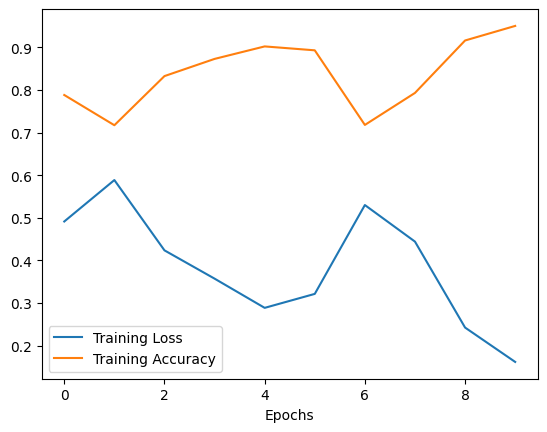

In [17]:
# Entraîner le modèle avec les données d'entraînement (x_train et y_train) pendant 10 epochs, avec un batch size de 128
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">9 - Évalueation du modéle </span>

313/313 [==============================] - 2s 5ms/step - loss: 0.4446 - accuracy: 0.8404
Test Accuracy: 84.04%


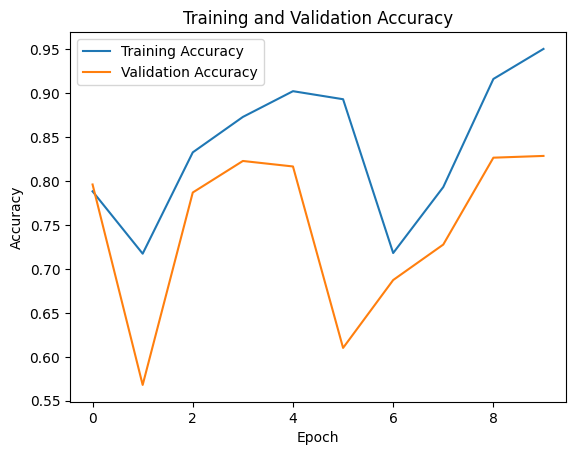

In [18]:
# Évaluer la performance du modèle sur l'ensemble de test
eval_result = model.evaluate(X_test, y_test)

# Afficher la précision
print(f"Test Accuracy: {eval_result[1]*100:.2f}%")

# Plotter l'historique d'entraînement pour visualiser la performance du modèle
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Import nécessaire
from sklearn.metrics import accuracy_score

# Prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


313/313 [==============================] - 1s 4ms/step
Accuracy: 84.04%


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

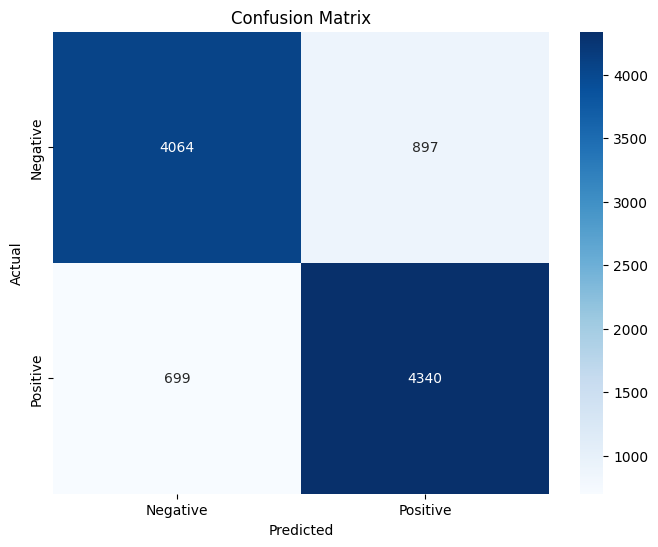

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec une visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Calculer et afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4961
           1       0.83      0.86      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

#### Précision (Precision) :
    * Pour la classe 0 (négative) : 85% des prédictions positives étaient effectivement négatives.
    * Pour la classe 1 (positive) : 83% des prédictions positives étaient effectivement positives.

#### Rappel (Recall) :

    * Pour la classe 0 (négative) : Le modèle a capturé 82% de toutes les instances réellement négatives.
    * Pour la classe 1 (positive) : Le modèle a capturé 86% de toutes les instances réellement positives.

#### F1-score :

    * La moyenne harmonique entre la précision et le rappel.
        - Pour la classe 0 : F1-score de 84%.
        - Pour la classe 1 : F1-score de 84%.

#### Support :

    * Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.
        - Pour la classe 0 : 4961 occurrences.
        - Pour la classe 1 : 5039 occurrences.

#### Précision globale (Accuracy) :

    * Le modèle a correctement classé 84% de toutes les instances dans l'ensemble de test.

#### Moyenne pondérée (Weighted Average) :

    * C'est la moyenne des métriques (précision, rappel, F1-score) pondérée par le nombre d'occurrences de chaque classe.
    * La moyenne pondérée donne une indication globale de la performance du modèle.

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2548067634.py, line 35)

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">10 -  Modification du nombre d'unités dans le GRU : </span>

In [36]:
# Modifier le nombre d'unités dans le GRU
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_length))
model.add(GRU(100))  # Modifiez le nombre d'unités à 100 (ou un autre nombre de votre choix)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec les nouvelles modifications
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
# Calculer et afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/10
250/250 [==============================] - 35s 132ms/step - loss: 0.6919 - accuracy: 0.5152 - val_loss: 0.6895 - val_accuracy: 0.5234
Epoch 2/10
250/250 [==============================] - 23s 92ms/step - loss: 0.6041 - accuracy: 0.6600 - val_loss: 0.6101 - val_accuracy: 0.7149
Epoch 3/10
250/250 [==============================] - 15s 61ms/step - loss: 0.3761 - accuracy: 0.8577 - val_loss: 0.4363 - val_accuracy: 0.8405
Epoch 4/10
250/250 [==============================] - 14s 55ms/step - loss: 0.2718 - accuracy: 0.9083 - val_loss: 0.4265 - val_accuracy: 0.8321
Epoch 5/10
250/250 [==============================] - 10s 40ms/step - loss: 0.1780 - accuracy: 0.9432 - val_loss: 0.3917 - val_accuracy: 0.8475
Epoch 6/10
250/250 [==============================] - 10s 41ms/step - loss: 0.1081 - accuracy: 0.9687 - val_loss: 0.4239 - val_accuracy: 0.8543
Epoch 7/10
250/250 [==============================] - 9s 38ms/step - loss: 0.0649 - accuracy: 0.9833 - val_loss: 0.5052 - val_accuracy:

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

> ##  <span style="color:blue ; font-style:italic; text-decoration:underline;"> - Dans cette partie, j'ai augmenté le nombre d'unités de 50. L'accuracy du modèle a augmenté de 0.02.</span>

> ##  <span style="color:green ; font-style:italic; text-decoration:underline;">11 -  Utilisation d'une autre fonction d'activation pour la couche de sortie : </span>

In [37]:
# Utiliser une autre fonction d'activation pour la couche de sortie
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_length))
model.add(GRU(50))
model.add(Dense(1, activation='softmax'))  # Utilisez 'softmax' ou une autre fonction d'activation de votre choix
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec les nouvelles modifications
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Entraîner le modèle avec les nouvelles modifications
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
# Calculer et afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/10
250/250 [==============================] - 36s 136ms/step - loss: 0.6888 - accuracy: 0.4988 - val_loss: 0.5581 - val_accuracy: 0.5000
Epoch 2/10
250/250 [==============================] - 22s 87ms/step - loss: 0.5299 - accuracy: 0.4988 - val_loss: 0.6432 - val_accuracy: 0.5000
Epoch 3/10
250/250 [==============================] - 15s 62ms/step - loss: 0.6336 - accuracy: 0.4988 - val_loss: 0.6745 - val_accuracy: 0.5000
Epoch 4/10
250/250 [==============================] - 14s 55ms/step - loss: 0.4871 - accuracy: 0.4988 - val_loss: 0.3950 - val_accuracy: 0.5000
Epoch 5/10
250/250 [==============================] - 9s 37ms/step - loss: 0.2322 - accuracy: 0.4988 - val_loss: 0.3732 - val_accuracy: 0.5000
Epoch 6/10
250/250 [==============================] - 8s 32ms/step - loss: 0.1386 - accuracy: 0.4988 - val_loss: 0.3679 - val_accuracy: 0.5000
Epoch 7/10
250/250 [==============================] - 8s 32ms/step - loss: 0.0887 - accuracy: 0.4988 - val_loss: 0.4472 - val_accuracy: 0

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

> ##  <span style="color:blue ; font-style:italic; text-decoration:underline;">- Dans cette partie, j'ai modifié la fonction d'activation de la dernière couche en utilisant "softmax", et l'accuracy du modèle a diminué de 0.30. </span>

# <center><span style="color:red; font-style:italic; text-decoration:underline;"> FIN </span></center>
